In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Połączenie danych z 12 miesięcy

In [3]:
files = [file for file in os.listdir('./Sales_Data_2019')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data_2019/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('all_months_2019.csv', index=False)

In [4]:
df = pd.read_csv('./all_months_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Usuwanie wartości NaN

In [6]:
df = df.dropna()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


### Dodanie kolumny z miesiącem, zmiana nazw kolumn

In [8]:
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [9]:
df = df.rename(columns={'Order ID':'Order_ID',
                        'Quantity Ordered':'Quantity_Ordered',
                       'Price Each':'Price_Each',
                       'Order Date':'Order_Date',
                       'Purchase Address':'Purchase_Address'})
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [10]:
df.Price_Each.value_counts()

11.95         21903
14.95         21658
2.99          20641
3.84          20577
11.99         18882
150           15450
99.99         13325
149.99         7507
700            6804
389.99         6230
379.99         6181
600            5490
300            4780
1700           4702
999.99         4128
109.99         4101
400            2056
600.0          1347
Price Each      355
150.0            99
700.0            38
1700.0           22
300.0            20
400.0             9
Name: Price_Each, dtype: int64

In [11]:
df[df.Price_Each == 'Price Each']

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


### Usuwanie wierszy bez wartości liczbowych i usunięcie starego indeksu

In [12]:
indexes = df[df.Price_Each == 'Price Each'].index
indexes_list = list(indexes)

for index in indexes_list:
    df = df.drop(index)

In [13]:
#df = df.drop([519, 1149, 1155, 2878, 2893, 3036, 3209, 3618, 4138, 4645, 4794, 5303, 6939, 7497, 8635, 9189, 9329, 9973, 10885, 10958, 11272, 11619, 11742, 11778, 11874, 12455, 13362, 14022, 14522, 14860, 15280, 17208, 17324, 17339, 17744, 18594, 18626, 19674, 19795, 19810, 20112, 20687, 20865, 20951, 21051, 21739, 24641, 24817, 25370, 25503, 26140, 26292, 26950, 27107, 27596, 27602, 27988, 28600, 28721, 29088, 29387, 30648, 31099, 31495, 33269, 34102, 34187, 34206, 34612, 35537, 35687, 37002, 37146, 37761, 38098, 38175, 38488, 40811, 41916, 41939, 42010, 42730, 42910, 43067, 43555, 46967, 47181, 47406, 47479, 49042, 49468, 49720, 49872, 49974, 50103, 50435, 50712, 50792, 50943, 51380, 51542, 51943, 52448, 52769, 53592, 53731, 54142, 54586, 54616, 56994, 57415, 57561, 57736, 58602, 58639, 58653, 58871, 58937, 59342, 59524, 59581, 60029, 60826, 61610, 62468, 62812, 67039, 68620, 68649, 68741, 69444, 70010, 70662, 70794, 71159, 71170, 72448, 73140, 74053, 75091, 75221, 75818, 76858, 78045, 78661, 78708, 78894, 78990, 79849, 80221, 80717, 80763, 80783, 80956, 81103, 81764, 82340, 82428, 82435, 83126, 84483, 85068, 85398, 85430, 85520, 85530, 85549, 85920, 85977, 86559, 86722, 87155, 87229, 87579, 89259, 89307, 89951, 91178, 91799, 92631, 93320, 93325, 94767, 94853, 95559, 95838, 95870, 95970, 96500, 96518, 97014, 97659, 99368, 99892, 100547, 100559, 102084, 102425, 102454, 102688, 104945, 105696, 106127, 106193, 107242, 107295, 107370, 107748, 107991, 108602, 109285, 109313, 109486, 109519, 110083, 110961, 111021, 112090, 112148, 112636, 112654, 112918, 113104, 113676, 114812, 115304, 116302, 117537, 117568, 118033, 118218, 118744, 119036, 119496, 119679, 119889, 121453, 121462, 121464, 121807, 121844, 123434, 123532, 124425, 124955, 125563, 125662, 126010, 126111, 126494, 127873, 128103, 129288, 129593, 130041, 130047, 130303, 130982, 131083, 131241, 131437, 131640, 133194, 134551, 134780, 135908, 136452, 136723, 136994, 138296, 138643, 138744, 138850, 139015, 139253, 139431, 139785, 140246, 140441, 140560, 141344, 141904, 141988, 142302, 142352, 143301, 143326, 144319, 144687, 145838, 146250, 147069, 147122, 148373, 149084, 149456, 149906, 150791, 152145, 152548, 153138, 153778, 154171, 154271, 154383, 155306, 155618, 156965, 157173, 159033, 159050, 160520, 160671, 160967, 161352, 161868, 162292, 163496, 163808, 164347, 166833, 166976, 167273, 168535, 170324, 170469, 170511, 170617, 170929, 171225, 171810, 172006, 172143, 172816, 172856, 173402, 173673, 175088, 176843, 178896, 178954, 179487, 180743, 181368, 183502, 183808, 184489, 184666, 184779, 185118, 185164, 185551, 186563, 186632, 186738])

In [14]:
df.Quantity_Ordered = df.Quantity_Ordered.astype('int64')
df.Price_Each = df.Price_Each.astype('float64')
df.Month = pd.to_numeric(df.Month)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity_Ordered  185950 non-null  int64  
 3   Price_Each        185950 non-null  float64
 4   Order_Date        185950 non-null  object 
 5   Purchase_Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 11.3+ MB


In [15]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [16]:
df = df.reset_index(drop=True)
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Wytypowanie najlepszego miesiąca pod względem sprzedaży i wizualizacja wyników

In [17]:
df['Sales'] = df['Quantity_Ordered'] * df['Price_Each']
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [18]:
results = df.groupby('Month').sum()
results

,Quantity_Ordered,Price_Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


<function matplotlib.pyplot.show(close=None, block=None)>

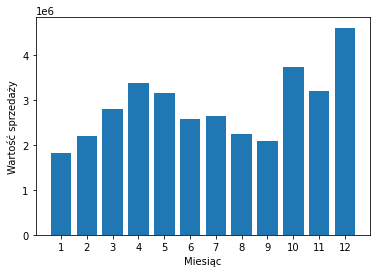

In [19]:
plt.bar(results.index, results['Sales']) 
plt.xticks(results.index) #numerowanie każdego słupka
plt.xlabel('Miesiąc')
plt.ylabel('Wartość sprzedaży')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

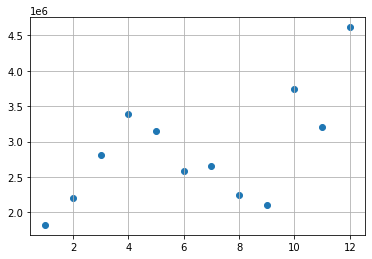

In [20]:
plt.scatter(results.index, results['Sales'], marker='o')
plt.grid()
plt.show

## Dodanie kolumny 'City' na podstawie kolumny 'Purchase_Address'

In [21]:
df['City'] = df['Purchase_Address'].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1])
df.head()                                      

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [22]:
df.value_counts('City')

City
 San Francisco CA    44732
 Los Angeles CA      29605
 New York City NY    24876
 Boston MA           19934
 Atlanta GA          14881
 Dallas TX           14820
 Seattle WA          14732
 Portland OR         10010
 Austin TX            9905
 Portland ME          2455
dtype: int64

## Sprzedaż według miasta

In [23]:
results_2 = df.groupby('City').sum()
results_2

,Quantity_Ordered,Price_Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


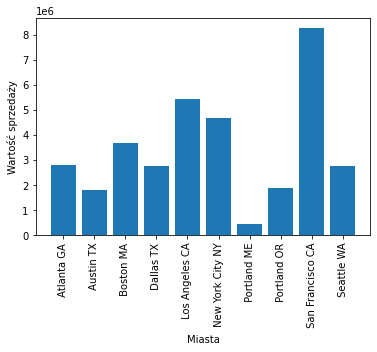

In [24]:
plt.bar(results_2.index, results_2['Sales'])
plt.xticks(results_2.index, rotation=90)
plt.xlabel('Miasta')
plt.ylabel('Wartość sprzedaży')
plt.show()

## W jakich okresach w roku sprzedaż jest najlepsza

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity_Ordered  185950 non-null  int64  
 3   Price_Each        185950 non-null  float64
 4   Order_Date        185950 non-null  object 
 5   Purchase_Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 12.8+ MB


In [27]:
df['Order_Date'] = pd.to_datetime(df['Order_Date']) #zmiana formatu wartości z object na datetime

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity_Ordered  185950 non-null  int64         
 3   Price_Each        185950 non-null  float64       
 4   Order_Date        185950 non-null  datetime64[ns]
 5   Purchase_Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 12.8+ MB


In [29]:
df['Hour'] = df['Order_Date'].dt.hour
df['Minute'] = df['Order_Date'].dt.minute
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [ ]:
hours = [hour for hour, df in df.groupby('Hour')]
plt.plot(hours, df.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.show()

In [33]:
result_3 = df.groupby('Hour').count()
result_3

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256
